In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random
import sys

In [3]:


def crossover_blx(population, apt_pop, crossover_params, min_value, max_value):

  crossover_pop = []
  alpha = crossover_params["alpha"]
  crossover_ratio = crossover_params["ratio"]

  
  while (len(crossover_pop) < population.shape[0]):
    parents_idx = random.sample(range(population.shape[0]), 2)

    random_number = random.random()
    
    parent_1, parent_2 = population[parents_idx][0], population[parents_idx][1]
    apt_parent_1, apt_parent_2 = apt_pop[parents_idx][0], apt_pop[parents_idx][1] 


    if (random_number < crossover_ratio):
      beta = np.random.uniform(-alpha, 1+alpha)

      son = parent_1 + beta*(parent_1 - parent_2)
      if ((min_value < np.all(son) < max_value)):
        crossover_pop.append(son)

    else:
      if (apt_parent_1 > apt_parent_2):
        crossover_pop.append(parent_1)

      else:
        crossover_pop.append(parent_2)

  return np.array(crossover_pop)


def mutation_uniform(population, mutation_params, min_value, max_value):
  mutation_ratio = mutation_params["ratio"]
  
  
  for cromomossom in population:
    random_list = np.random.rand(len(cromomossom))
    check_mutation = random_list < mutation_ratio
    
    for i, mutation_bool in zip(range(len(cromomossom)), check_mutation):
      
      if (mutation_bool):
        cromomossom[i] = np.random.uniform(min_value, max_value)
    
  return np.array(population)


def select_tournment(current_pop, current_apt, pop_size, n):
  selected_pop = []
  selected_apt = []
  for i in range(pop_size):
    idx_random = random.sample(range(pop_size), n)
    box_pop = current_pop[idx_random]
    box_apt = current_apt[idx_random]
    idx_winner = np.argmax(box_apt)
    selected_pop.append(box_pop[idx_winner])
    selected_apt.append(box_apt[idx_winner])

  return np.array(selected_pop), np.array(selected_apt)    



class Genetic_Algorithm():
  def __init__(self, function, n_genes, min_value, max_value, pop_size, n_epochs, 
                       crossover_dict, mutation_dict, elitism_dict):
    
    
    self.n_genes = n_genes
    self.min_value = min_value
    self.max_value = max_value
    self.pop_size = pop_size
    self.crossover_dict = crossover_dict
    self.mutation_dict = mutation_dict
    self.elitism_dict = elitism_dict
    self.n_epochs = n_epochs
    self.evaluate_apt = function

    self.initial_population = self.generate_initial_population()

    if (crossover_dict["method"] == "blx"):
      self.crossover = crossover_blx

    else:
      print("This crossover method has been not implemented")
    
    if (mutation_dict["method"] == "uniform"):
      self.mutation = mutation_uniform

    else:
      print("This mutation method has been not implemented")

    if (selection_dict["method"] == "tournment"):
      self.selection = select_tournment

    else:
      print("This selection method has been not implemented")


  def generate_initial_population(self):  
    initial_population = []    
    for n in range(self.pop_size):
      genes_list = []
      for i in range(self.n_genes):
        genes_list.append(random.uniform(self.min_value, self.max_value))
      initial_population.append(np.array(genes_list))

    return np.array(initial_population)

  def ordering(self, current_pop, current_apt) :
    sorted_apt = sorted(current_apt, reverse=True)
    sorted_pop = []
    
    for idx, apt in enumerate(sorted_apt):
      sorted_pop.append(current_pop[list(current_apt).index(apt)])
    
    
    return np.array(sorted_pop), sorted_apt

  def run(self):

    maximum_apt = []
    average_apt = []

    current_pop = self.initial_population
    current_apt = self.evaluate_apt(current_pop)

    best_cromo = current_pop[np.argmax(current_apt)]
    apt_max_cromo = np.max(current_apt)

    maximum_apt.append(apt_max_cromo)
    average_apt.append(np.mean(current_apt))

    for i in range(self.n_epochs):
      print("Epoch : %s"%(i))
      sorted_population, sorted_apt = self.ordering(current_pop, current_apt)

      selected_pop, selected_apt = self.selection(current_pop, current_apt, self.pop_size, 3)

      if ( (self.elitism_dict["elitism_bool"]) and (best_cromo not in selected_pop) ):
        selected_pop = np.vstack((selected_pop, best_cromo))
        selected_apt = np.append(selected_apt, apt_max_cromo)

      current_pop = self.crossover(selected_pop, selected_apt, self.crossover_dict, self.min_value, self.max_value)

      current_pop = self.mutation(current_pop, self.mutation_dict, self.min_value, self.max_value) 

      current_apt = self.evaluate_apt(current_pop)

      sorted_population, sorted_apt = self.ordering(current_pop, current_apt)

      maximum_apt.append(max(current_apt))
        
      average_apt.append(np.mean(current_apt))        
    
    return maximum_apt, average_apt

def function_1(population):

  x = population[:, 0]
  y = population[:, 1]

  apt = 0.5 - ((np.square( np.sin( np.square(x) + np.square(y)) ) - 0.5)/( np.square(1.0 + 0.001*(np.square(x) + np.square(y)) ) ))
  
  return apt

Epoch : 0
Epoch : 1
Epoch : 2
Epoch : 3
Epoch : 4
Epoch : 5
Epoch : 6
Epoch : 7
Epoch : 8
Epoch : 9
Epoch : 10
Epoch : 11
Epoch : 12
Epoch : 13
Epoch : 14
Epoch : 15
Epoch : 16
Epoch : 17
Epoch : 18
Epoch : 19
Epoch : 20
Epoch : 21
Epoch : 22
Epoch : 23
Epoch : 24
Epoch : 25
Epoch : 26
Epoch : 27
Epoch : 28
Epoch : 29
Epoch : 30
Epoch : 31
Epoch : 32
Epoch : 33
Epoch : 34
Epoch : 35
Epoch : 36
Epoch : 37
Epoch : 38
Epoch : 39
Epoch : 40
Epoch : 41
Epoch : 42
Epoch : 43
Epoch : 44
Epoch : 45
Epoch : 46
Epoch : 47
Epoch : 48
Epoch : 49


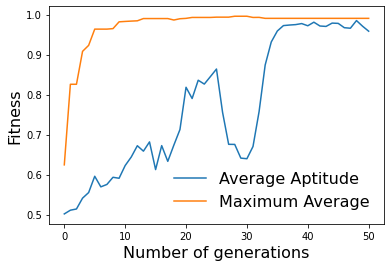

In [5]:
min_value = -100
max_value = 100
n_epochs = 50
pop_size = 100
n_genes = 2
crossover_ratio = 0.8
mutation_ratio = 0.01
elitism_bool = True
elitism_number = 1

crossover_dict = {"method": "blx", "ratio": crossover_ratio, "alpha":0.5}
mutation_dict = {"method": "uniform", "ratio": mutation_ratio}
elitism_dict = {"elitism_bool":True, "elitism_number": elitism_number}
selection_dict = {"method": "tournment"}


ag = Genetic_Algorithm(function_1, n_genes, min_value, max_value, pop_size, n_epochs, 
                       crossover_dict, mutation_dict, elitism_dict)

max_apt, average_apt = ag.run()

generation = np.arange(0,n_epochs+1)

fig, ax = plt.subplots()
plt.plot(generation, average_apt, label="Average Aptitude")
plt.plot(generation, max_apt, label="Maximum Average")
plt.xlabel("Number of generations", fontsize=16)
plt.ylabel("Fitness", fontsize=16)
plt.legend(frameon=False, fontsize=16)